In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

#### Exploring and preprocessing dataset

In [71]:
data = pd.read_csv(r'D:\Centennial College Materials\FIFTH SEMESTER\COMP 258 - NEURAL NETWORKS\PROJECT\COMP258-Project\data\Student data.csv')

In [72]:
data

,Student Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Independent variables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,First Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Second Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,First Language' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Funding numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.413043,0,?,4.0,6.0,2.0,2.0,2.0,2.0,1,1,?,47,10,0.0
1456,4.36,4.074074,1,2.0,6.0,1.0,1.0,1.0,1.0,2,4,?,?,10,1.0
1457,2.020833,2.45,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78,18,9,1.0
1458,4.021739,4.357143,?,4.0,6.0,2.0,1.0,2.0,1.0,1,2,?,46,8,1.0


In [73]:
adjusted_data = data[23:]

In [74]:
adjusted_data

,Student Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
23,0,0,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59,16,7,1.0
24,2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,?,?,7,1.0
25,4.25,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92,41,9,1.0
26,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,?,?,8,1.0
27,4.275,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97,?,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.413043,0,?,4.0,6.0,2.0,2.0,2.0,2.0,1,1,?,47,10,0.0
1456,4.36,4.074074,1,2.0,6.0,1.0,1.0,1.0,1.0,2,4,?,?,10,1.0
1457,2.020833,2.45,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78,18,9,1.0
1458,4.021739,4.357143,?,4.0,6.0,2.0,1.0,2.0,1.0,1,2,?,46,8,1.0


In [75]:
column_names = ['1st Term GPA', '2nd Term GPA', 'First Language', 'Funding', 'School', 'Fast Track', 'Coop',
                'Residency', 'Gender', 'Prev Education', 'Age Group', 'High School Average Mark', 'Math Score',
                'English Grade', 'FirstYearPersistence']

In [76]:
adjusted_data.columns = column_names

In [77]:
adjusted_data.head()

,1st Term GPA,2nd Term GPA,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
23,0,0,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59,16,7,1.0
24,2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,?,?,7,1.0
25,4.25,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92,41,9,1.0
26,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,?,?,8,1.0
27,4.275,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97,?,9,1.0


In [78]:
adjusted_data.dtypes

1st Term GPA                 object
2nd Term GPA                 object
First Language               object
Funding                     float64
School                      float64
Fast Track                  float64
Coop                        float64
Residency                   float64
Gender                      float64
Prev Education               object
Age Group                    object
High School Average Mark     object
Math Score                   object
English Grade                object
FirstYearPersistence        float64
dtype: object

In [79]:
# Convert the data types of the columns to the appropriate types

#* Numeric columns

numeric_columns = ['1st Term GPA', '2nd Term GPA', 'High School Average Mark', 'Math Score']

cat_columns = ['First Language', 'Funding', 'School', 'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education', 'Age Group', 'English Grade', 'FirstYearPersistence']

# Convert numeric columns to numeric, coercing errors to NaN
adjusted_data[numeric_columns] = adjusted_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to category type
adjusted_data[cat_columns] = adjusted_data[cat_columns].astype('category')

In [80]:
adjusted_data.dtypes

1st Term GPA                 float64
2nd Term GPA                 float64
First Language              category
Funding                     category
School                      category
Fast Track                  category
Coop                        category
Residency                   category
Gender                      category
Prev Education              category
Age Group                   category
High School Average Mark     float64
Math Score                   float64
English Grade               category
FirstYearPersistence        category
dtype: object

In [81]:
# Replace '?' with NaN
adjusted_data.replace('?', np.nan, inplace=True)

In [82]:
# Check for missing values
adjusted_data.isnull().sum()

1st Term GPA                 17
2nd Term GPA                160
First Language              111
Funding                       0
School                        0
Fast Track                    0
Coop                          0
Residency                     0
Gender                        0
Prev Education                4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

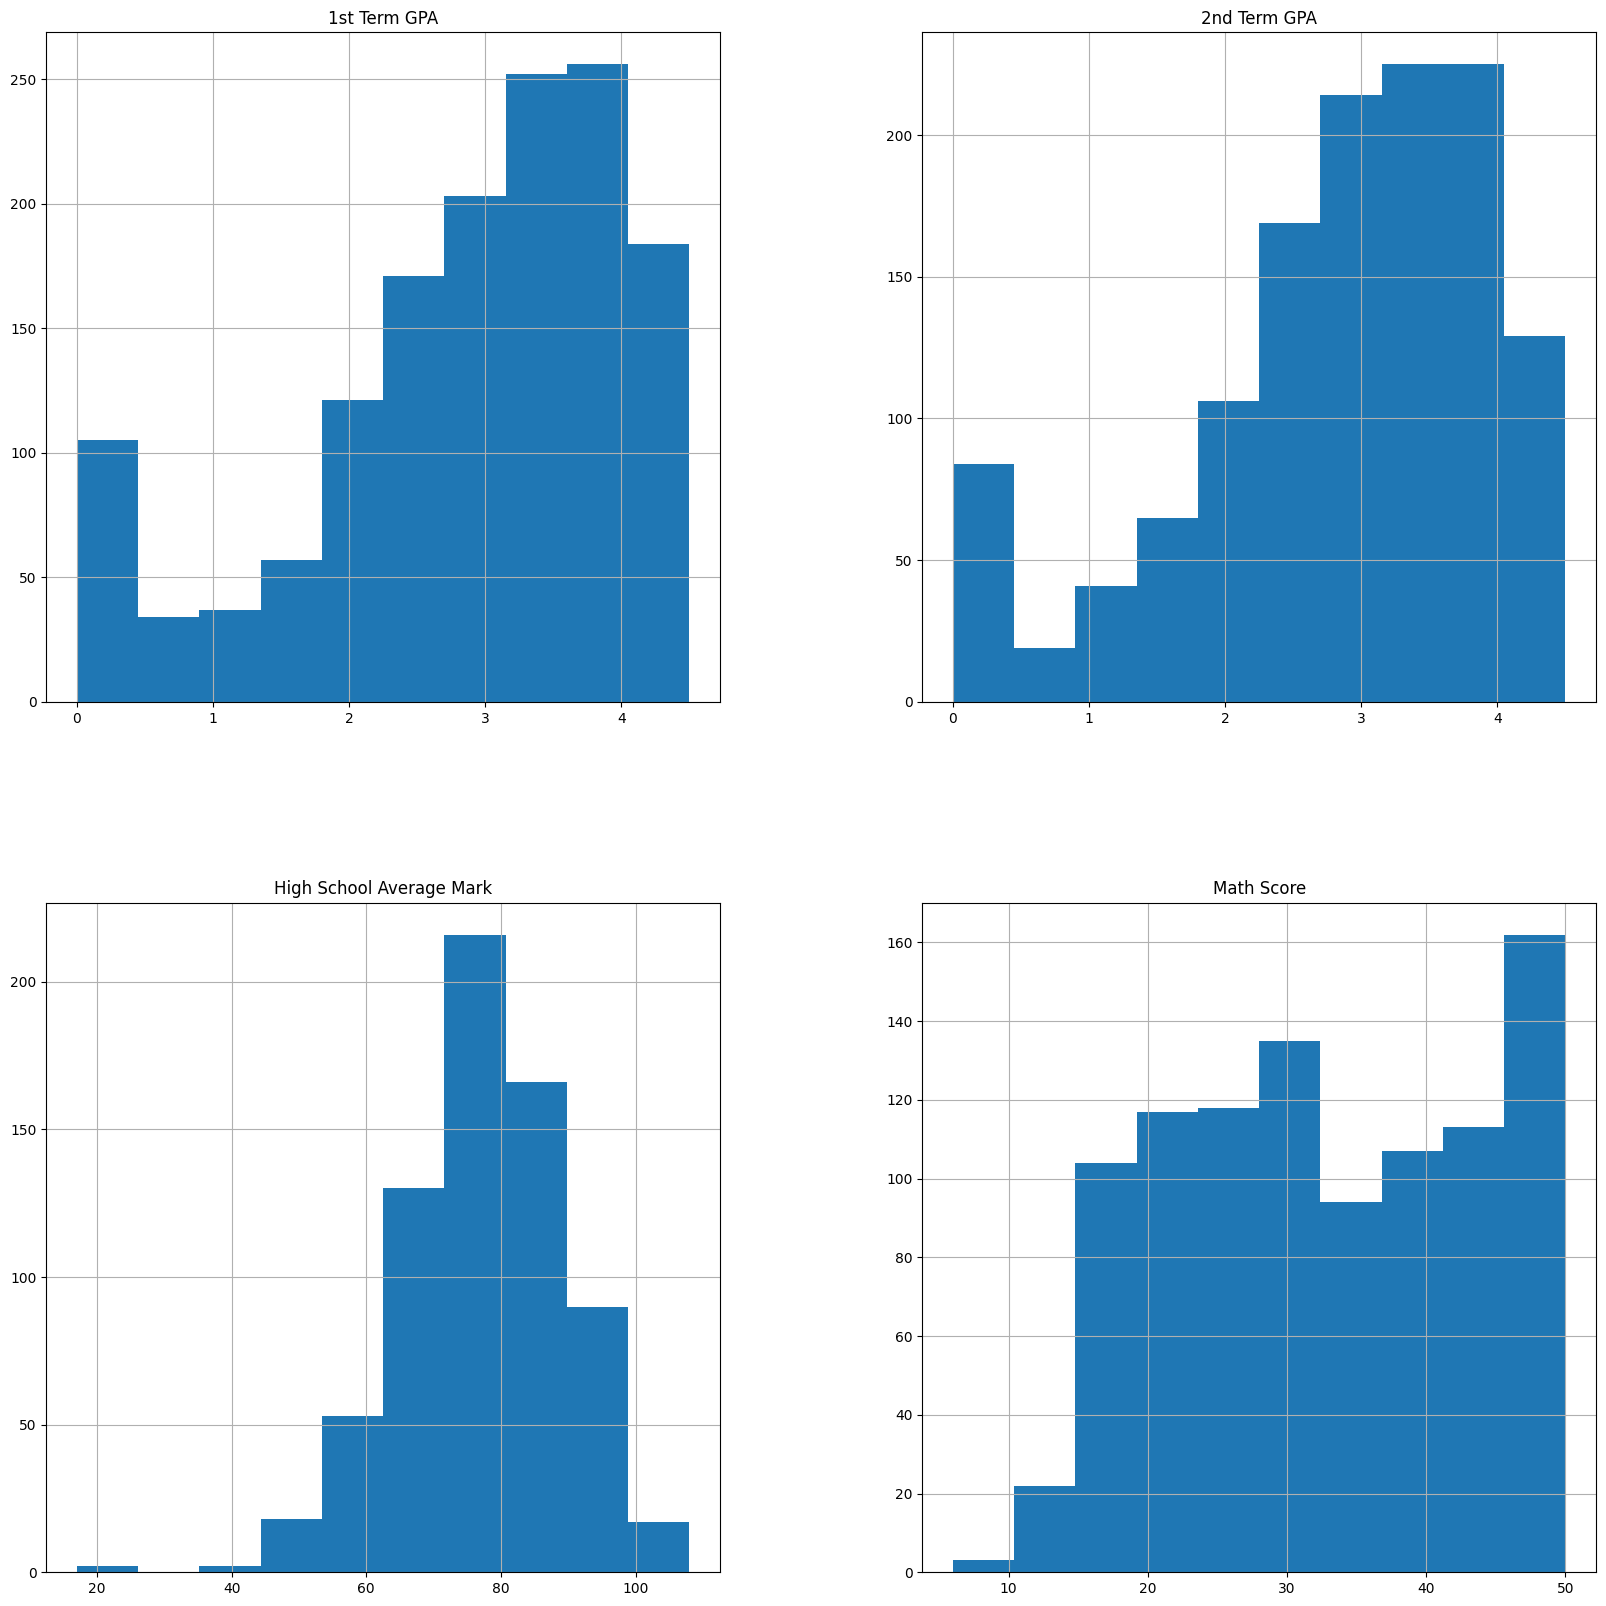

In [83]:
# Plot histograms of the columns

adjusted_data.hist(figsize=(20, 20))
plt.show()

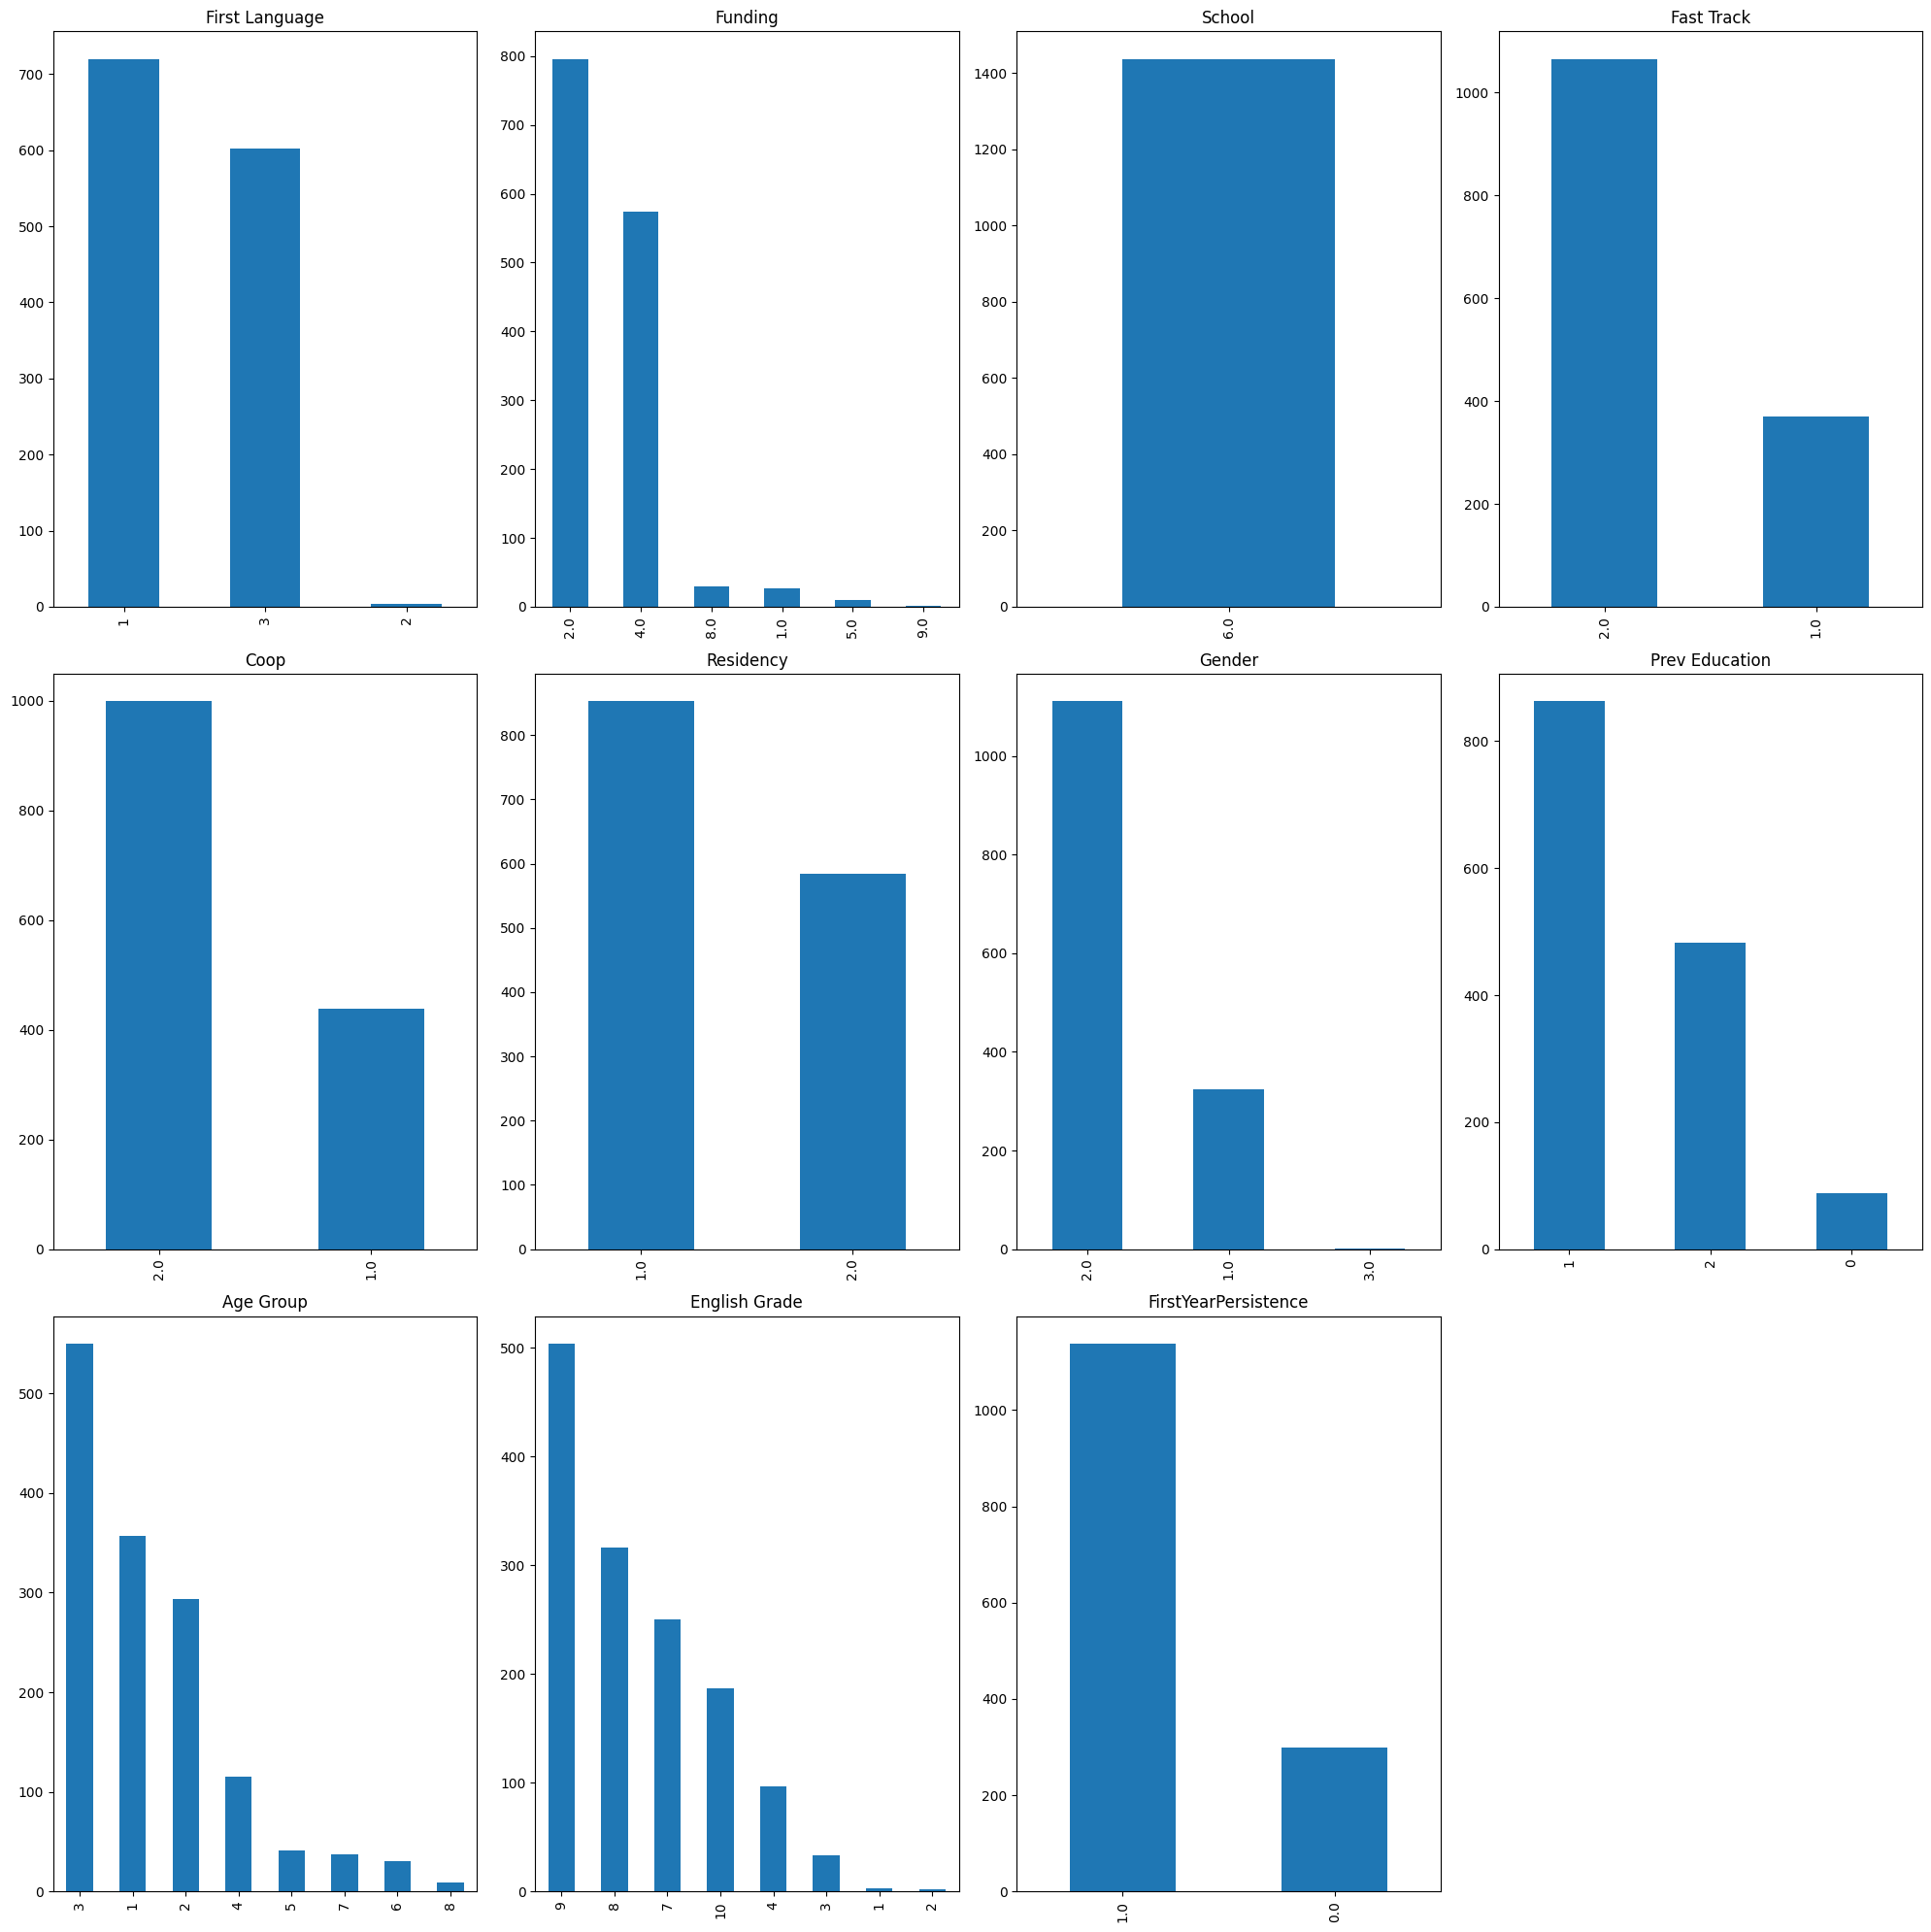

In [84]:
cat_columns_df = adjusted_data[cat_columns]

num_plots = len(cat_columns_df.columns)

fig, axs = plt.subplots(3, 4, figsize=(20, 20))

for i, column in enumerate(cat_columns_df.columns):
    ax = axs[int(i/4), i%4]
    cat_columns_df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(column)
for j in range(num_plots, 3 * 4):
    fig.delaxes(axs[int(j/4), j%4])
plt.tight_layout()
plt.show()

In [85]:
adjusted_data['Prev Education'].value_counts()

1    863
2    482
0     88
Name: Prev Education, dtype: int64

In [86]:
adjusted_data['Prev Education'].replace('0', np.nan, inplace=True)

In [87]:
# Plot the correlation matrix

corr = adjusted_data.corr()

plt.figure(figsize=(15, 10))
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,1st Term GPA,2nd Term GPA,High School Average Mark,Math Score
1st Term GPA,1.00,0.80,0.59,0.46
2nd Term GPA,0.80,1.00,0.55,0.45
High School Average Mark,0.59,0.55,1.00,0.53
Math Score,0.46,0.45,0.53,1.00


<Figure size 1500x1000 with 0 Axes>

In [88]:
# Check duplicate rows
adjusted_data.duplicated().sum()

1

In [89]:
# Drop duplicate rows
adjusted_data.drop_duplicates(inplace=True)

In [90]:
adjusted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 23 to 1459
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   1st Term GPA              1419 non-null   float64 
 1   2nd Term GPA              1277 non-null   float64 
 2   First Language            1325 non-null   category
 3   Funding                   1436 non-null   category
 4   School                    1436 non-null   category
 5   Fast Track                1436 non-null   category
 6   Coop                      1436 non-null   category
 7   Residency                 1436 non-null   category
 8   Gender                    1436 non-null   category
 9   Prev Education            1344 non-null   category
 10  Age Group                 1432 non-null   category
 11  High School Average Mark  694 non-null    float64 
 12  Math Score                975 non-null    float64 
 13  English Grade             1391 non-null   categ

In [91]:
adjusted_data = adjusted_data.drop('School', axis=1)

In [92]:
X = adjusted_data.drop('FirstYearPersistence', axis=1)
y = adjusted_data['FirstYearPersistence']

In [93]:
def passthrough(x):
    return x

In [94]:
mean_cols = ['High School Average Mark', 'Math Score']
mode_cols = ['Prev Education', 'Age Group', 'English Grade']
fill_with_0_cols = ['1st Term GPA', '2nd Term GPA']
fill_with_3_cols = ['First Language']
passthrough_cols = ['Funding', 'Fast Track', 'Coop', 'Residency', 'Gender']


mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')
fill_with_0_imputer = SimpleImputer(strategy='constant', fill_value=0.0)
fill_with_3_imputer = SimpleImputer(strategy='constant', fill_value=3)
pass_through = FunctionTransformer(passthrough)


mean_pipeline = Pipeline([
    ('mean_imputer', mean_imputer),
])

mode_pipeline = Pipeline([
    ('mode_imputer', mode_imputer),
])

fill_with_0_pipeline = Pipeline([
    ('fill_with_0_imputer', fill_with_0_imputer),
])

fill_with_3_pipeline = Pipeline([
    ('fill_with_3_imputer', fill_with_3_imputer),
])

pass_through_pipeline = Pipeline([
    ('pass_through', pass_through)
])

handle_missing_preprocessor = ColumnTransformer([
    ('mean_pipeline', mean_pipeline, mean_cols),
    ('fill_with_0_pipeline', fill_with_0_pipeline, fill_with_0_cols),
    ('fill_with_3_pipeline', fill_with_3_pipeline, fill_with_3_cols),
    ('mode_pipeline', mode_pipeline, mode_cols),
    ('pass_through_pipeline', pass_through_pipeline, passthrough_cols),
])

handle_missing_pipeline = Pipeline([
    ('handle_missing_preprocessor', handle_missing_preprocessor),
])

In [95]:
def combine_features(X):
    column_names = mean_cols + fill_with_0_cols + fill_with_3_cols + mode_cols + passthrough_cols
    df_handle_missing = pd.DataFrame(X, columns=column_names)
    
    # Convert the columns to the appropriate types
    num_cols = ['High School Average Mark', 'Math Score', '1st Term GPA', '2nd Term GPA']
    cat_cols = ['First Language', 'Funding', 'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education', 'Age Group', 'English Grade']
    
    df_handle_missing[num_cols] = df_handle_missing[num_cols].apply(pd.to_numeric, errors='coerce')
    df_handle_missing[cat_cols] = df_handle_missing[cat_cols].astype('int')
    df_handle_missing[cat_cols] = df_handle_missing[cat_cols].astype('object')
    
    return df_handle_missing

In [96]:
num_cols = ['High School Average Mark', 'Math Score', '1st Term GPA', '2nd Term GPA']
onehot_cols = ['First Language','Funding', 'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education']
oridinal_cols = ['Age Group', 'English Grade']

scaler = StandardScaler()
onehotencoder = OneHotEncoder(handle_unknown='ignore')
ordinalencoder = OrdinalEncoder(handle_unknown='error')

preprocessor = ColumnTransformer([
    ('scaler', scaler, num_cols),
    ('onehotencoder', onehotencoder, onehot_cols),
    ('ordinalencoder', ordinalencoder, oridinal_cols),
])

scale_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

In [97]:
final_pipeline = Pipeline([
    ('handle_missing_pipeline', handle_missing_pipeline),
    ('combine_features', FunctionTransformer(combine_features)),
    ('scale_pipeline', scale_pipeline),
])

In [98]:
# Dataset is imbalanced, we should use StratifiedShuffleSplit to split the data
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for val_index, test_index in sss.split(X_test, y_test):
    X_val, X_test = X_test.iloc[val_index], X_test.iloc[test_index]
    y_val, y_test = y_test.iloc[val_index], y_test.iloc[test_index]

In [99]:
X_train_prepared = final_pipeline.fit_transform(X_train)
X_val_prepared = final_pipeline.transform(X_val)
X_test_prepared = final_pipeline.transform(X_test)

In [100]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prepared, y_train)

In [101]:
col_names_1 = ['High School Average Mark', 'Math Score']
col_names_2 = ['1st Term GPA', '2nd Term GPA']

onehot_col_names = final_pipeline.named_steps['scale_pipeline'].named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(onehot_cols)
ordinal_col_names = oridinal_cols

combined_columns = col_names_1 + col_names_2 + list(onehot_col_names) + list(ordinal_col_names)


cleaned_train_data = pd.DataFrame(X_train_resampled, columns=combined_columns)
cleaned_train_data['FirstYearPersistence'] = y_train_resampled

cleaned_val_data = pd.DataFrame(X_val_prepared, columns=combined_columns)
cleaned_val_data['FirstYearPersistence'] = y_val.reset_index(drop=True)

cleaned_test_data = pd.DataFrame(X_test_prepared, columns=combined_columns)
cleaned_test_data['FirstYearPersistence'] = y_test.reset_index(drop=True)

In [102]:
cleaned_train_data.to_csv(r'cleaned_train_data.csv', index=False)
cleaned_val_data.to_csv(r'cleaned_val_data.csv', index=False)
cleaned_test_data.to_csv(r'cleaned_test_data.csv', index=False)

### Applying OneHotEncoding to the target variable

In [103]:
y_train_encoded = y_train_resampled.astype('int')
y_train_encoded = onehotencoder.fit_transform(y_train_encoded.values.reshape(-1, 1)).toarray()

y_val_encoded = y_val.astype('int')
y_val_encoded = onehotencoder.transform(y_val_encoded.values.reshape(-1, 1)).toarray()

y_test_encoded = y_test.astype('int')
y_test_encoded = onehotencoder.transform(y_test_encoded.values.reshape(-1, 1)).toarray()

# Add the column names to the y_transformed
y_encoded_names = onehotencoder.get_feature_names_out(['FirstYearPersistence'])

# Add the column names to the y_transformed_df
y_train_encoded_df = pd.DataFrame(y_train_encoded, columns=y_encoded_names)
y_val_encoded_df = pd.DataFrame(y_val_encoded, columns=y_encoded_names)
y_test_encoded_df = pd.DataFrame(y_test_encoded, columns=y_encoded_names)

# Combine both df
final_train_data = pd.concat([cleaned_train_data, y_train_encoded_df], axis=1)
final_train_data.drop('FirstYearPersistence', axis=1, inplace=True)

final_val_data = pd.concat([cleaned_val_data, y_val_encoded_df], axis=1)
final_val_data.drop('FirstYearPersistence', axis=1, inplace=True)

final_test_data = pd.concat([cleaned_test_data, y_test_encoded_df], axis=1)
final_test_data.drop('FirstYearPersistence', axis=1, inplace=True)

In [105]:
import joblib

joblib.dump(final_pipeline, 'final_pipeline.pkl')

['final_pipeline.pkl']